In [2]:
source("./ins_paquetes.R")

ins_paquetes('MLmetrics','reshape','data.table','dplyr',
             'party','lattice','sqldf','ggplot2','mlr',
             'nortest','tseries')

library(reshape)
library(data.table)
library(dplyr)
library(MLmetrics)
library(party)
library(lattice)
library(sqldf)
library(ggplot2)
library(mlr)
library(nortest)
library(tseries)


Bellow Packages Successfully Installed:

 MLmetrics    reshape data.table      dplyr      party    lattice      sqldf 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
   ggplot2        mlr    nortest    tseries 
      TRUE       TRUE       TRUE       TRUE 


In [3]:
########### 2) DATA A UTILIZAR ################# 

train <- read.csv("./datasets/data_loan_status.csv")

head(train)

Loan_Status,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Dependents,Self_Employed,Credit_History,Amauntxterm,Property_Area,Income
1,0,120,360,2,1,1,2,48.74167,1,5849
0,1508,128,360,2,2,1,2,47.58594,1,4583
1,0,66,360,2,1,2,2,45.45455,1,3000
1,2358,120,360,2,1,1,2,41.17500,1,2583
1,0,141,360,2,1,1,2,42.55319,1,6000
1,4196,267,360,2,3,2,2,36.00375,1,5417


In [4]:
########### 3) TRATAMIENTO DE LA DATA ################# 

## en primer lugar ver el analisis descriptivo de la data

resumen <- data.frame(summarizeColumns(train))
write.csv(resumen,"tabla_resumen.csv")

resumen

name,type,na,mean,disp,median,mad,min,max,nlevs
Loan_Status,integer,0,0.6872964,0.4639727,1.00000,0.00000,0.0000,1.0000,0
CoapplicantIncome,numeric,0,1621.2457980,2926.2483692,1188.50000,1762.07010,0.0000,41667.0000,0
LoanAmount,integer,0,145.4657980,84.1809670,125.00000,44.47800,9.0000,700.0000,0
Loan_Amount_Term,integer,0,342.4104235,64.4286291,360.00000,0.00000,12.0000,480.0000,0
Gender,integer,0,1.8175896,0.3864973,2.00000,0.00000,1.0000,2.0000,0
Dependents,integer,0,1.7442997,1.0096234,1.00000,0.00000,1.0000,4.0000,0
Self_Employed,integer,0,1.1335505,0.3404461,1.00000,0.00000,1.0000,2.0000,0
Credit_History,integer,0,1.8550489,0.3523386,2.00000,0.00000,1.0000,2.0000,0
Amauntxterm,numeric,0,51.3092255,37.7769436,41.45654,11.05022,12.0902,396.3667,0
Property_Area,integer,0,1.3794788,0.4856529,1.00000,0.00000,1.0000,2.0000,0


In [5]:
########### 4) PRIMER ANALISIS  ################# 

## generamos una copia de la data original

data_train <- train

## imputar en primer lugar la data
#Impute and re-impute data
#Allows imputation of missing feature values through various techniques. 

data_train <- mlr::impute(train, classes = list(factor = imputeMode(), 
                                                integer = imputeMode(),
                                                numeric = imputeMedian()))

data_train <- data_train$data[,1:ncol(train)]


## luego dar un orden a las variables

summary(data_train)

  Loan_Status     CoapplicantIncome   LoanAmount    Loan_Amount_Term
 Min.   :0.0000   Min.   :    0     Min.   :  9.0   Min.   : 12.0   
 1st Qu.:0.0000   1st Qu.:    0     1st Qu.:100.2   1st Qu.:360.0   
 Median :1.0000   Median : 1188     Median :125.0   Median :360.0   
 Mean   :0.6873   Mean   : 1621     Mean   :145.5   Mean   :342.4   
 3rd Qu.:1.0000   3rd Qu.: 2297     3rd Qu.:164.8   3rd Qu.:360.0   
 Max.   :1.0000   Max.   :41667     Max.   :700.0   Max.   :480.0   
     Gender        Dependents    Self_Employed   Credit_History 
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000  
 Median :2.000   Median :1.000   Median :1.000   Median :2.000  
 Mean   :1.818   Mean   :1.744   Mean   :1.134   Mean   :1.855  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:1.000   3rd Qu.:2.000  
 Max.   :2.000   Max.   :4.000   Max.   :2.000   Max.   :2.000  
  Amauntxterm     Property_Area       Income     
 Min.   : 12

In [6]:
#dplyr::reexports   %>% Objects exported from other packages. Pipe operator

cualis <- data_train %>% select(Loan_Status,Gender,Dependents,
                                Self_Employed,Credit_History,
                                Property_Area)
cuantis <- data_train %>% select(-Loan_Status,-Gender,-Dependents,
                                 -Self_Employed,-Credit_History,
                                 -Property_Area)


data_train <- cbind(cualis,cuantis)
head(data_train)

Loan_Status,Gender,Dependents,Self_Employed,Credit_History,Property_Area,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Amauntxterm,Income
1,2,1,1,2,1,0,120,360,48.74167,5849
0,2,2,1,2,1,1508,128,360,47.58594,4583
1,2,1,2,2,1,0,66,360,45.45455,3000
1,2,1,1,2,1,2358,120,360,41.17500,2583
1,2,1,1,2,1,0,141,360,42.55319,6000
1,2,3,2,2,1,4196,267,360,36.00375,5417


In [7]:
# recodificacion manual

## ojo: siempre y cuando aplique realizarlo

## ver correlacion antes de categorizar

source("./funciones.R")

corre <- cor(data_train,method = c("spearman"))

## colocamos la primera funcion de correlacion
corre <- correlacionS(corre)

corre$filtro <- ifelse(abs(corre$cor)>0.6,1,0)

corre

i,j,cor,filtro
Loan_Status,Gender,0.0179866787,0
Loan_Status,Dependents,0.0089823290,0
Gender,Dependents,0.1682933570,0
Loan_Status,Self_Employed,-0.0037004377,0
Gender,Self_Employed,-0.0005249884,0
Dependents,Self_Employed,0.0725515324,0
Loan_Status,Credit_History,0.5405560719,0
Gender,Credit_History,0.0091698521,0
Dependents,Credit_History,-0.0317232667,0
Self_Employed,Credit_History,-0.0015504603,0


In [8]:
write.csv(corre,"correlacion_variables.csv",row.names = F)

# categorizando a factor

data_train[,1:ncol(cualis)] <- lapply(data_train[,1:ncol(cualis)],as.factor)

summary(data_train)

 Loan_Status Gender  Dependents Self_Employed Credit_History Property_Area
 0:192       1:112   1:360      1:532         1: 89          1:381        
 1:422       2:502   2:102      2: 82         2:525          2:233        
                     3:101                                                
                     4: 51                                                
                                                                          
                                                                          
 CoapplicantIncome   LoanAmount    Loan_Amount_Term  Amauntxterm    
 Min.   :    0     Min.   :  9.0   Min.   : 12.0    Min.   : 12.09  
 1st Qu.:    0     1st Qu.:100.2   1st Qu.:360.0    1st Qu.: 35.53  
 Median : 1188     Median :125.0   Median :360.0    Median : 41.46  
 Mean   : 1621     Mean   :145.5   Mean   :342.4    Mean   : 51.31  
 3rd Qu.: 2297     3rd Qu.:164.8   3rd Qu.:360.0    3rd Qu.: 52.15  
 Max.   :41667     Max.   :700.0   Max.   :480.0    Max.   :3

In [9]:
## primer modelo regresion multiple ##

# retiramos la variable correlacionada

data.frame(names(data_train))

names.data_train.
Loan_Status
Gender
Dependents
Self_Employed
Credit_History
Property_Area
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Amauntxterm


In [10]:
formula <-    Income ~
  #Loan_Status+
  #     Gender+
  # Dependents+
  #Self_Employed+
  # Credit_History+
  # Property_Area+
  CoapplicantIncome+
  LoanAmount+
  Loan_Amount_Term+
  Amauntxterm


modelo1 <- glm(formula,data=data_train,gaussian(link = "identity"))

# indicadores mediante la segunda funcion
calcula_indicadores(modelo1)

variable,SSE,correlacion
regresion,6137184465,0.8929965


In [11]:
# pesos del modelo importancia mediante la tercera funcion
pesos(modelo1)

variable2,pesos
Loan_Amount_Ter,0.1094597
CoapplicantIncom,16.0623489
Amauntxter,34.7335041
LoanAmoun,49.0946874


In [12]:
# ver la significancia del modelo
summary(modelo1)


Call:
glm(formula = formula, family = gaussian(link = "identity"), 
    data = data_train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-18996    -357     307     654   44902  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -5.071e+03  7.716e+02  -6.572 1.07e-10 ***
CoapplicantIncome -9.062e-01  4.701e-02 -19.278  < 2e-16 ***
LoanAmount         5.341e+01  1.585e+00  33.703  < 2e-16 ***
Loan_Amount_Term  -3.188e+00  2.003e+00  -1.591    0.112    
Amauntxterm        1.026e+02  3.619e+00  28.349  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 10077479)

    Null deviance: 2.2877e+10  on 613  degrees of freedom
Residual deviance: 6.1372e+09  on 609  degrees of freedom
AIC: 11651

Number of Fisher Scoring iterations: 2


In [13]:
## reajustando

formula <-    Income ~
  CoapplicantIncome+
  LoanAmount+
  Amauntxterm

modelo2 <- glm(formula,data=data_train,gaussian(link = "identity"))

# indicadores mediante la segunda funcion
calcula_indicadores(modelo2)

variable,SSE,correlacion
regresion,6162706824,0.8966708


In [14]:
# pesos del modelo importancia mediante la tercera funcion
pesos(modelo2)

variable2,pesos
CoapplicantIncom,15.93867
Amauntxter,35.20294
LoanAmoun,48.85838


In [15]:
# ver la significancia del modelo
summary(modelo2)


Call:
glm(formula = formula, family = gaussian(link = "identity"), 
    data = data_train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-19160    -347     307     609   44785  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -6.180e+03  3.315e+02  -18.64   <2e-16 ***
CoapplicantIncome -9.033e-01  4.703e-02  -19.21   <2e-16 ***
LoanAmount         5.333e+01  1.586e+00   33.63   <2e-16 ***
Amauntxterm        1.031e+02  3.611e+00   28.54   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 10102798)

    Null deviance: 2.2877e+10  on 613  degrees of freedom
Residual deviance: 6.1627e+09  on 610  degrees of freedom
AIC: 11651

Number of Fisher Scoring iterations: 2


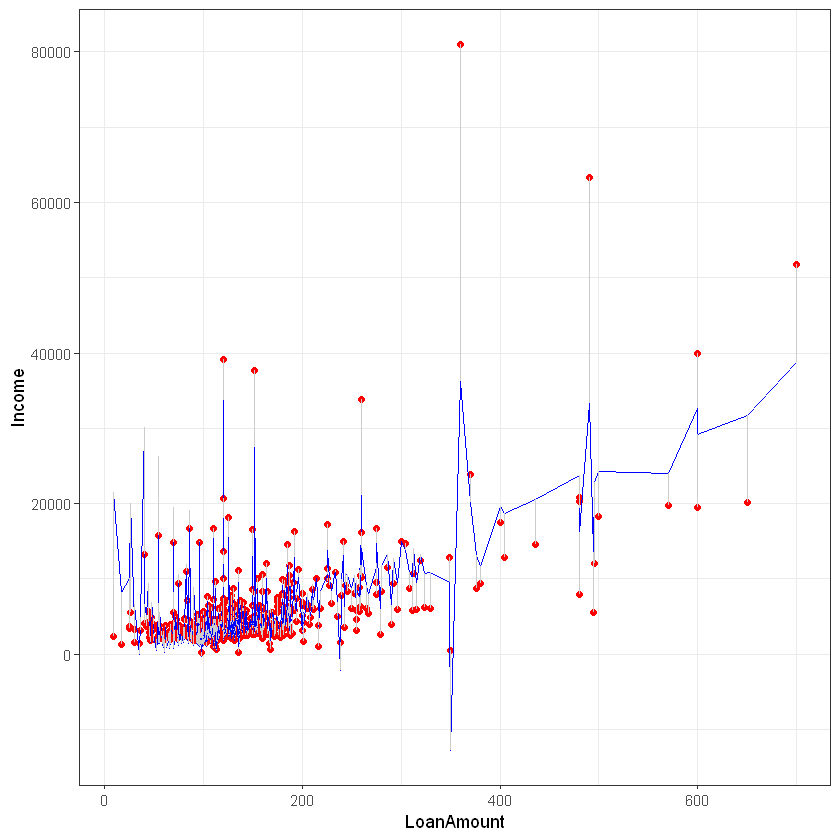

In [16]:
# Obtenemos los valores ajustados o predichos
estimados <- modelo2$fitted.values

ggplot(data = data_train, aes(x = LoanAmount, y = Income)) + geom_point(color = "red") +
  geom_line(aes(y = estimados), color = "blue") +
  geom_segment(aes(x = LoanAmount, xend = LoanAmount, y = Income, yend = estimados, color="Distancia"), color = "grey80") +
  labs(xlab = "LoanAmount", ylab = "ingresos") + 
  theme_bw()

# Sesion 2
Se debe de ver como si fuera un espejo.

En este modelo hay un problema de linealidad, porque no hay esa proporcion

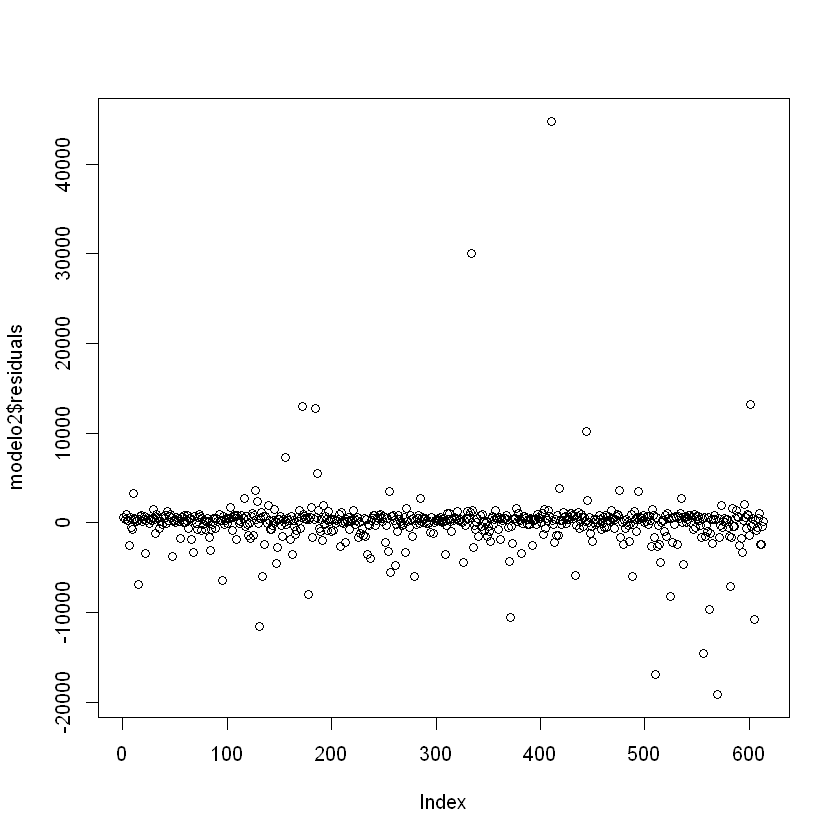

In [17]:
plot(modelo2$residuals)

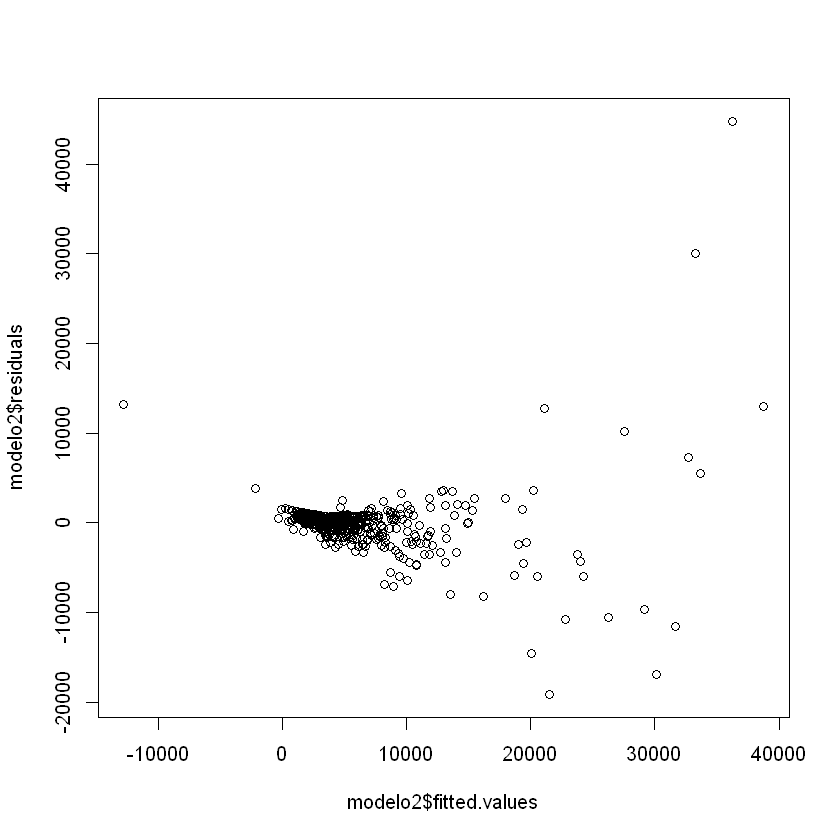

In [18]:
plot(modelo2$fitted.values,modelo2$residuals)

## Test de Shapiro-Wilk
El valor de la data proviene de una distribucion nomal.

Si nos da un p-value pequeño, rechazamos la hipotesis nula. <0.5

No proviene de una distribucion normal, en este caso

Ho <- La data proviene de una distribucion normal

In [19]:
## Test de Shapiro-Wilk
shapiro.test(x = modelo2$residuals)


	Shapiro-Wilk normality test

data:  modelo2$residuals
W = 0.46728, p-value < 2.2e-16


## Test de Kolmogorov-Smirnov
Si el valor es pequeño, se rechaza la hipotesis nula

In [20]:
## Test de Kolmogorov-Smirnov
ks.test(x = modelo2$residuals,"pnorm")

Warning message in ks.test(x = modelo2$residuals, "pnorm"):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  modelo2$residuals
D = 0.65308, p-value < 2.2e-16
alternative hypothesis: two-sided


In [21]:
## modificaci?n de Lillefors
lillie.test(x = modelo2$residuals)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  modelo2$residuals
D = 0.28304, p-value < 2.2e-16


In [22]:
## Test de Jarque-Bera
jarque.bera.test(x = modelo2$residuals)


	Jarque Bera Test

data:  modelo2$residuals
X-squared = 176258, df = 2, p-value < 2.2e-16
